## Assignment 2.5 - Gradient Tree Boosting
    Submitted by: 
    Amandeep Kaur (21044104)                                                                                   
    Bhupesh Dod (21046099)

## Import the Libraries

In [1]:
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
import timeit

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GB

## Import the Data

In [2]:
abalone_data = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/abalone.csv",
names= ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 
'Viscera_weight','Shell_weight', 'Rings'])


wine_data1 = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/winequality-red.csv",
 sep = ";")
wine_data1["colour"]=1
wine_data1 = wine_data1[list(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour', 'quality'))]

wine_data2 = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/winequality-white.csv",
sep = ";")
wine_data2["colour"]=0
wine_data2 = wine_data2[list(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour', 'quality'))]

wine_data = pd.concat([wine_data1, wine_data2])

wine_data = wine_data.reset_index()

X_abalone = abalone_data.iloc[:, 1:-1]
y_abalone = abalone_data.iloc[:, -1]

X_wine = wine_data.iloc[:, :-1]
y_wine = wine_data.iloc[:, -1]

sc = StandardScaler()

# Gradient Boosting

### Abalone Raw

In [3]:
X_a_train_raw, X_a_test_raw, y_a_train_raw, y_a_test_raw = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_raw.iloc[:, :] = sc.fit_transform(X_a_train_raw.iloc[:, :])
X_a_test_raw.iloc[:, :] = sc.transform(X_a_test_raw.iloc[:, :])


# On Abalone Raw
gb = GB( random_state = 0)
X_a_train_raw = gb.fit(X_a_train_raw , y_a_train_raw)
y_a_pred_raw = gb.predict(X_a_test_raw)
print("Accuracy of Abalone Raw for default Gradient Tree Boosting values: %.2f" % (accuracy_score(y_a_pred_raw, y_a_test_raw)*100)+"%")

Accuracy of Abalone Raw for default Gradient Tree Boosting values: 25.45%


### Abalone PCA

In [4]:
X_a_train_pca, X_a_test_pca, y_a_train_pca, y_a_test_pca = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_pca = sc.fit_transform(X_a_train_pca)
X_a_test_pca = sc.transform(X_a_test_pca)

pca = PCA(0.95)
X_a_train_pca = pca.fit_transform(X_a_train_pca)
X_a_test_pca = pca.transform(X_a_test_pca)


# On Abalone PCA
X_a_train_pca = gb.fit(X_a_train_pca, y_a_train_pca)
y_a_pred_pca = gb.predict(X_a_test_pca)
print("Accuracy of Abalone PCA for default Gradient Tree Boosting values: %.2f" % (accuracy_score(y_a_pred_pca, y_a_test_pca)*100)+"%")

Accuracy of Abalone PCA for default Gradient Tree Boosting values: 23.83%


### Abalone LDA

In [5]:
X_a_train_lda, X_a_test_lda, y_a_train_lda, y_a_test_lda = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_lda = sc.fit_transform(X_a_train_lda)
X_a_test_lda = sc.transform(X_a_test_lda)

lda = LDA(n_components=4)
X_a_train_lda = lda.fit_transform(X_a_train_lda, y_a_train_lda)
X_a_test_lda = lda.transform(X_a_test_lda)

#On Abalone LDA

X_a_train_lda = gb.fit(X_a_train_lda, y_a_train_lda)
y_a_pred_lda = gb.predict(X_a_test_lda)
print("Accuracy of Abalone LDA for default Gradient Tree Boosting values: %.2f" % (accuracy_score(y_a_pred_lda, y_a_test_lda)*100)+"%")

Accuracy of Abalone LDA for default Gradient Tree Boosting values: 23.25%


## Using GridSearchCV

### Abalone Raw

In [6]:
X_a_train_raw, X_a_test_raw, y_a_train_raw, y_a_test_raw = train_test_split(X_abalone, y_abalone, random_state= 100)


X_a_train_raw.iloc[:, :] = sc.fit_transform(X_a_train_raw.iloc[:, :])
X_a_test_raw.iloc[:, :] = sc.transform(X_a_test_raw.iloc[:, :])

param_grid = { 'max_leaf_nodes' : [4,8,16,32],
               'max_depth' : [3,4,5,6,7,8],
               'n_estimators' : [3,4,5,6,7]
             }

grid_a_raw = GridSearchCV(GB(), param_grid, refit= True, verbose=0)
grid_a_raw.fit(X_a_train_raw, y_a_train_raw)
print("Best Parameters for Abalone Raw Gradient Tree Boosting are:" +str(grid_a_raw.best_params_))
results_a_raw = pd.DataFrame(grid_a_raw.cv_results_)

Best Parameters for Abalone Raw Gradient Tree Boosting are:{'max_depth': 5, 'max_leaf_nodes': 4, 'n_estimators': 7}


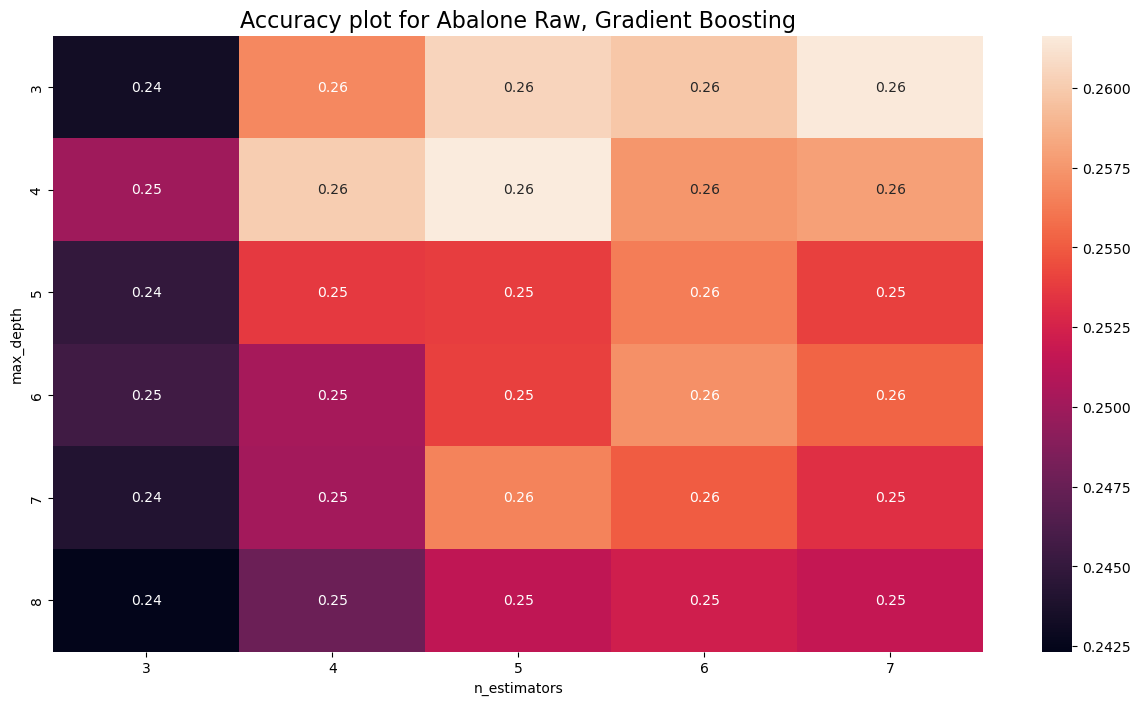

In [7]:
ac_df=pd.DataFrame(grid_a_raw.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid_a_raw.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot_table(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Abalone Raw, Gradient Boosting", fontsize = 16)
plt.show()

In [8]:
a_a_raw=results_a_raw.loc[results_a_raw['rank_test_score'] == min(results_a_raw['rank_test_score'])]
a_a_raw=a_a_raw.iloc[:1]

In [9]:
start_a_raw = timeit.default_timer()
gradient_boost = GB(max_depth = int(a_a_raw['param_max_depth']),n_estimators = int(a_a_raw['param_n_estimators']), max_leaf_nodes=int(a_a_raw['param_max_leaf_nodes']))
X_a_train_raw = gradient_boost.fit(X_a_train_raw , y_a_train_raw)
y_a_pred_raw = gradient_boost.predict(X_a_test_raw)
stop_a_raw = timeit.default_timer()

print('Time: %.3f' %(stop_a_raw - start_a_raw))
print('Runtime: %.3f' %(stop_a_raw - start_a_raw), 'sec')

Time: 0.556
Runtime: 0.556 sec


In [10]:
print('The best accuracy for Abalone Raw using parameters max_depth=' ,int(a_a_raw['param_max_depth']),', estimators=', int(a_a_raw['param_n_estimators']),'and max leaf nodes=',int(a_a_raw['param_max_leaf_nodes']), "for Gradient Tree Boosting is: %.2f" %(accuracy_score(y_a_pred_raw, y_a_test_raw)*100), '%')

The best accuracy for Abalone Raw using parameters max_depth= 5 , estimators= 7 and max leaf nodes= 4 for Gradient Tree Boosting is: 26.60 %


### Abalone PCA

In [11]:
X_a_train_pca, X_a_test_pca, y_a_train_pca, y_a_test_pca = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_pca = sc.fit_transform(X_a_train_pca)
X_a_test_pca = sc.transform(X_a_test_pca)

pca = PCA(0.95)
X_a_train_pca = pca.fit_transform(X_a_train_pca)
X_a_test_pca = pca.transform(X_a_test_pca)

param_grid = { 'max_leaf_nodes' : [4,8,16,32],
               'max_depth' : [3,4,5,6,7,8],
               'n_estimators' : [3,4,5,6,7]
             }

grid_a_pca = GridSearchCV(GB(), param_grid, refit= True, verbose=0)
grid_a_pca.fit(X_a_train_pca, y_a_train_pca)
print("Best Parameters for Abalone PCA Gradient Tree Boosting are:" +str(grid_a_pca.best_params_)) 
results_a_pca = pd.DataFrame(grid_a_pca.cv_results_)

Best Parameters for Abalone PCA Gradient Tree Boosting are:{'max_depth': 4, 'max_leaf_nodes': 4, 'n_estimators': 5}


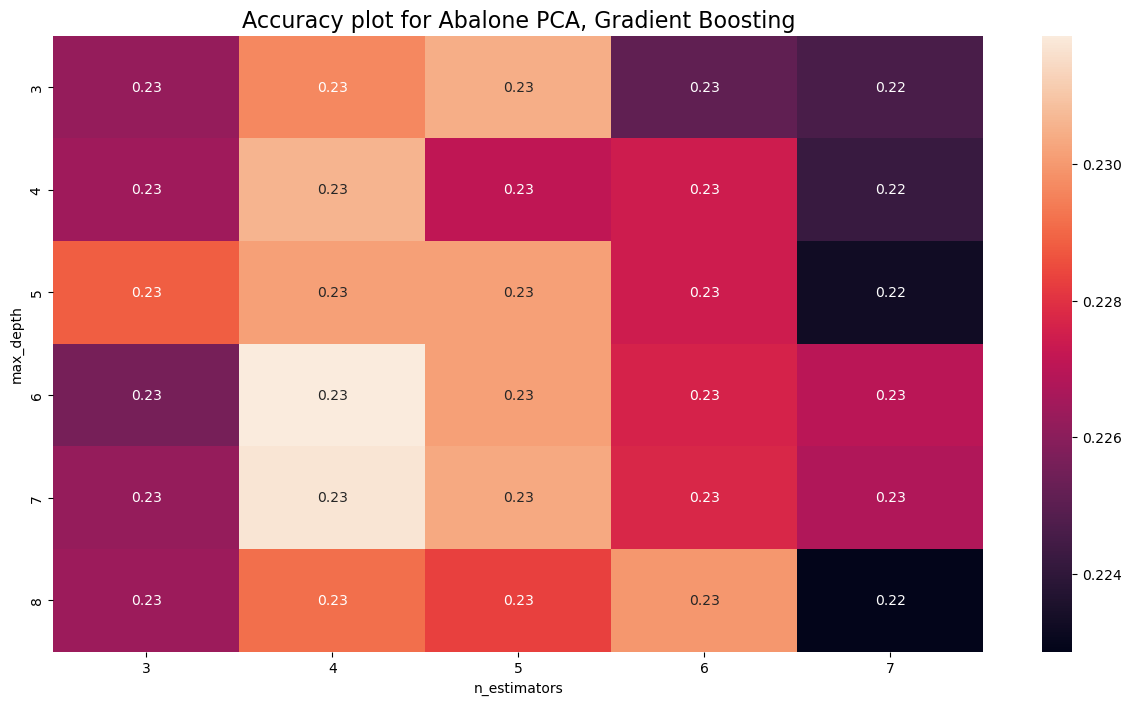

In [12]:
ac_df=pd.DataFrame(grid_a_pca.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid_a_pca.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot_table(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Abalone PCA, Gradient Boosting", fontsize = 16)
plt.show()

In [13]:
a_a_pca=results_a_pca.loc[results_a_pca['rank_test_score'] == min(results_a_pca['rank_test_score'])]
a_a_pca = a_a_pca.iloc[:1]

In [14]:
start_a_pca = timeit.default_timer()
gradient_boost = GB(max_depth = int(a_a_pca['param_max_depth']),n_estimators = int(a_a_pca['param_n_estimators']), max_leaf_nodes=int(a_a_pca['param_max_leaf_nodes']))
X_a_train_pca = gradient_boost.fit(X_a_train_pca , y_a_train_pca)
y_a_pred_pca = gradient_boost.predict(X_a_test_pca)
stop_a_pca = timeit.default_timer()

print('Time: %.3f' %(stop_a_pca- start_a_pca))
print('Runtime: %.3f' %(stop_a_pca - start_a_pca), 'sec')

Time: 0.392
Runtime: 0.392 sec


In [15]:
print('The best accuracy for Abalone PCA using parameters max_depth=' ,int(a_a_pca['param_max_depth']),', estimators=', int(a_a_pca['param_n_estimators']),'and max leaf nodes=',int(a_a_pca['param_max_leaf_nodes']), "for Gradient Tree Boosting is: %.2f" %(accuracy_score(y_a_pred_pca, y_a_test_pca)*100), '%')

The best accuracy for Abalone PCA using parameters max_depth= 4 , estimators= 5 and max leaf nodes= 4 for Gradient Tree Boosting is: 23.83 %


### Abalone LDA

In [16]:
X_a_train_lda, X_a_test_lda, y_a_train_lda, y_a_test_lda = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_lda = sc.fit_transform(X_a_train_lda)
X_a_test_lda = sc.transform(X_a_test_lda)

lda = LDA(n_components=4)
X_a_train_lda = lda.fit_transform(X_a_train_lda, y_a_train_lda)
X_a_test_lda = lda.transform(X_a_test_lda)


param_grid = { 'max_leaf_nodes' : [4,8,16,32],
               'max_depth' : [1,2,3,4,5,6,7,8],
               'n_estimators' : [3,4,5,6,10]
             }

grid_a_lda = GridSearchCV(GB(), param_grid, refit= True, verbose=0)
grid_a_lda.fit(X_a_train_lda, y_a_train_lda)
print("Best Parameters for Abalone LDA Gradient Tree Boosting are:" +str(grid_a_lda.best_params_)) 
results_a_lda = pd.DataFrame(grid_a_lda.cv_results_)

Best Parameters for Abalone LDA Gradient Tree Boosting are:{'max_depth': 2, 'max_leaf_nodes': 16, 'n_estimators': 10}


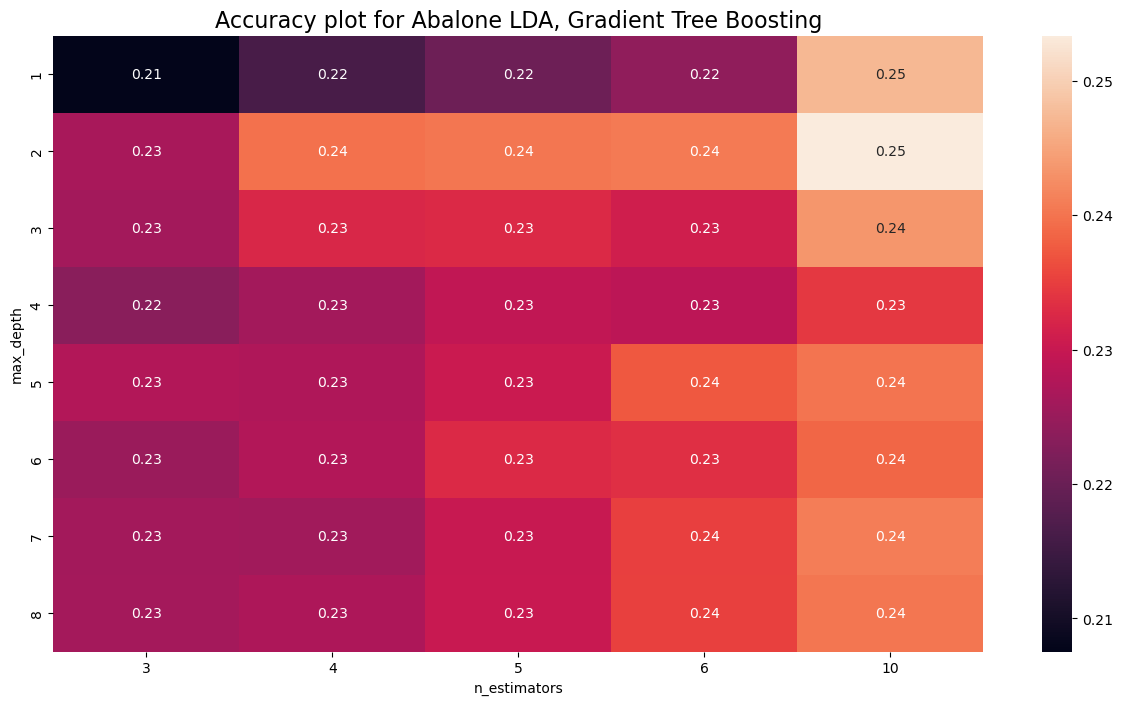

In [17]:
ac_df=pd.DataFrame(grid_a_lda.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid_a_lda.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot_table(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Abalone LDA, Gradient Tree Boosting", fontsize = 16)
plt.show()

In [18]:
a_a_lda=results_a_lda.loc[results_a_lda['rank_test_score'] == min(results_a_lda['rank_test_score'])]
a_a_lda=a_a_lda.iloc[:1]

In [19]:
start_a_lda = timeit.default_timer()
gradient_boost = GB(max_depth = int(a_a_lda['param_max_depth']),n_estimators = int(a_a_lda['param_n_estimators']), max_leaf_nodes=int(a_a_lda['param_max_leaf_nodes']))
X_a_train_lda = gradient_boost.fit(X_a_train_lda , y_a_train_lda)
y_a_pred_lda = gradient_boost.predict(X_a_test_lda)
stop_a_lda = timeit.default_timer()

print('Time: %.3f' %(stop_a_lda- start_a_lda))
print('Runtime: %.3f' %(stop_a_lda - start_a_lda), 'sec')

Time: 0.815
Runtime: 0.815 sec


In [20]:
print('The best accuracy for Abalone LDA using parameters max_depth=' ,int(a_a_lda['param_max_depth']),', estimators=', int(a_a_lda['param_n_estimators']),'and max leaf nodes=',int(a_a_lda['param_max_leaf_nodes']), "for Gradient Tree Boosting is: %.2f" %(accuracy_score(y_a_pred_lda, y_a_test_lda)*100), '%')

The best accuracy for Abalone LDA using parameters max_depth= 2 , estimators= 10 and max leaf nodes= 16 for Gradient Tree Boosting is: 26.70 %


## Wine Data

## Wine Raw

In [21]:
X_w_train_raw, X_w_test_raw, y_w_train_raw, y_w_test_raw = train_test_split(X_wine, y_wine, random_state= 45)

X_w_train_raw.iloc[:, :-1] = sc.fit_transform(X_w_train_raw.iloc[:, :-1])
X_w_test_raw.iloc[:, :-1] = sc.transform(X_w_test_raw.iloc[:, :-1])


# On Wine Raw
dt = GB(random_state = 0)
X_w_train_raw = dt.fit(X_w_train_raw , y_w_train_raw)
y_w_pred_raw = dt.predict(X_w_test_raw)
print("Accuracy of Wine Raw for default Gradient Tree Boosting values: %.2f" % (accuracy_score(y_w_pred_raw, y_w_test_raw)*100)+"%")

Accuracy of Wine Raw for default Gradient Tree Boosting values: 59.45%


## Wine PCA

In [22]:
X_w_train_pca, X_w_test_pca, y_w_train_pca, y_w_test_pca = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_pca.iloc[:, :-1] = sc.fit_transform(X_w_train_pca.iloc[:, :-1])
X_w_test_pca.iloc[:, :-1] = sc.transform(X_w_test_pca.iloc[:, :-1])

pca = PCA(0.95)
X_w_train_pca = pca.fit_transform(X_w_train_pca)
X_w_test_pca = pca.transform(X_w_test_pca)


# On Wine PCA
X_w_train_pca = dt.fit(X_w_train_pca, y_w_train_pca)
y_w_pred_pca = dt.predict(X_w_test_pca)
print("Accuracy of Wine PCA for default Gradient Tree Boosting values: %.2f" % (accuracy_score(y_w_pred_pca, y_w_test_pca)*100)+"%")

Accuracy of Wine PCA for default Gradient Tree Boosting values: 57.48%


## Wine LDA

In [23]:
X_w_train_lda, X_w_test_lda, y_w_train_lda, y_w_test_lda = train_test_split(X_wine, y_wine, random_state= 45)

X_w_train_lda.iloc[:, :-1] = sc.fit_transform(X_w_train_lda.iloc[:, :-1])
X_w_test_lda.iloc[:, :-1] = sc.transform(X_w_test_lda.iloc[:, :-1])

lda = LDA(n_components=4)
X_w_train_lda = lda.fit_transform(X_w_train_lda, y_w_train_lda)
X_w_test_lda = lda.transform(X_w_test_lda)

#On Wine LDA

X_w_train_lda = dt.fit(X_w_train_lda, y_w_train_lda)
y_w_pred_lda = dt.predict(X_w_test_lda)
print("Accuracy of Wine LDA for default Gradient Tree Boosting values: %.2f" % (accuracy_score(y_w_pred_lda, y_w_test_lda)*100)+"%")



Accuracy of Wine LDA for default Gradient Tree Boosting values: 57.05%


## Using GridSearchCV

### Wine Raw

In [24]:
X_w_train_raw, X_w_test_raw, y_w_train_raw, y_w_test_raw = train_test_split(X_wine, y_wine, random_state= 100)


X_w_train_raw.iloc[:, :-1] = sc.fit_transform(X_w_train_raw.iloc[:, :-1])
X_w_test_raw.iloc[:, :-1] = sc.transform(X_w_test_raw.iloc[:, :-1])


param_grid = { 'max_leaf_nodes' : [4,8,16,32],
               'max_depth' : [1,2,3,4,5,6,7,8],
               'n_estimators' : [3,4,5,6,10]
             }

grid_w_raw = GridSearchCV(GB(), param_grid, refit= True, verbose=0)
grid_w_raw.fit(X_w_train_raw, y_w_train_raw)
print("Best Parameters for Wine Raw Gradient Tree Boosting are:" +str(grid_w_raw.best_params_)) 
results_w_raw = pd.DataFrame(grid_w_raw.cv_results_)

Best Parameters for Wine Raw Gradient Tree Boosting are:{'max_depth': 6, 'max_leaf_nodes': 32, 'n_estimators': 10}


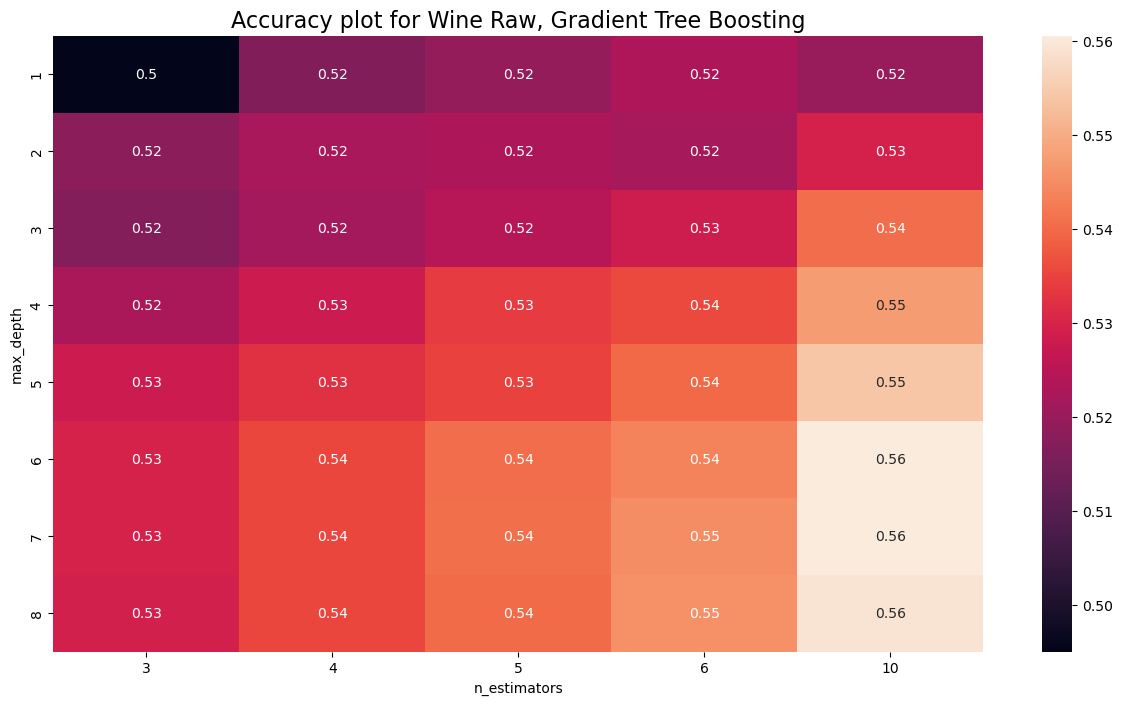

In [25]:
ac_df=pd.DataFrame(grid_w_raw.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid_w_raw.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot_table(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Wine Raw, Gradient Tree Boosting", fontsize = 16)
plt.show()

In [26]:
a_w_raw=results_w_raw.loc[results_w_raw['rank_test_score'] == min(results_w_raw['rank_test_score'])]
a_w_raw = a_w_raw.iloc[:1]

In [27]:
start_w_raw = timeit.default_timer()
gradient_boost = GB(max_depth = int(a_w_raw['param_max_depth']),n_estimators = int(a_w_raw['param_n_estimators']), max_leaf_nodes=int(a_w_raw['param_max_leaf_nodes']))
X_w_train_raw = gradient_boost.fit(X_w_train_raw , y_w_train_raw)
y_w_pred_raw = gradient_boost.predict(X_w_test_raw)
stop_w_raw = timeit.default_timer()

print('Time: %.3f' %(stop_w_raw- start_w_raw))
print('Runtime: %.3f' %(stop_w_raw - start_w_raw), 'sec')

Time: 0.956
Runtime: 0.956 sec


In [29]:
print('The best accuracy for Wine Raw using parameters max_depth=' ,int(a_w_raw['param_max_depth']),', estimators=', int(a_w_raw['param_n_estimators']),'and max leaf nodes=',int(a_w_raw['param_max_leaf_nodes']), "for Gradient Tree Boosting is: %.2f" %(accuracy_score(y_w_pred_raw, y_w_test_raw)*100), '%')

The best accuracy for Wine Raw using parameters max_depth= 6 , estimators= 10 and max leaf nodes= 32 for Gradient Tree Boosting is: 59.57 %


### Wine PCA

In [30]:
X_w_train_pca, X_w_test_pca, y_w_train_pca, y_w_test_pca = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_pca.iloc[:, :-1] = sc.fit_transform(X_w_train_pca.iloc[:, :-1])
X_w_test_pca.iloc[:, :-1] = sc.transform(X_w_test_pca.iloc[:, :-1])

pca = PCA(0.95)
X_w_train_pca = pca.fit_transform(X_w_train_pca)
X_w_test_pca = pca.transform(X_w_test_pca)


param_grid = { 'max_leaf_nodes' : [4,8,16,32],
               'max_depth' : [1,2,3,4,5,6,7,8],
               'n_estimators' : [3,4,5,6,10]
             }

grid_w_pca = GridSearchCV(GB(), param_grid, refit= True, verbose=0)
grid_w_pca.fit(X_w_train_pca, y_w_train_pca)
print("Best Parameters for Wine PCA Gradient Tree Boosting are:" +str(grid_w_pca.best_params_)) 
results_w_pca = pd.DataFrame(grid_w_pca.cv_results_)

Best Parameters for Wine PCA Gradient Tree Boosting are:{'max_depth': 7, 'max_leaf_nodes': 32, 'n_estimators': 10}


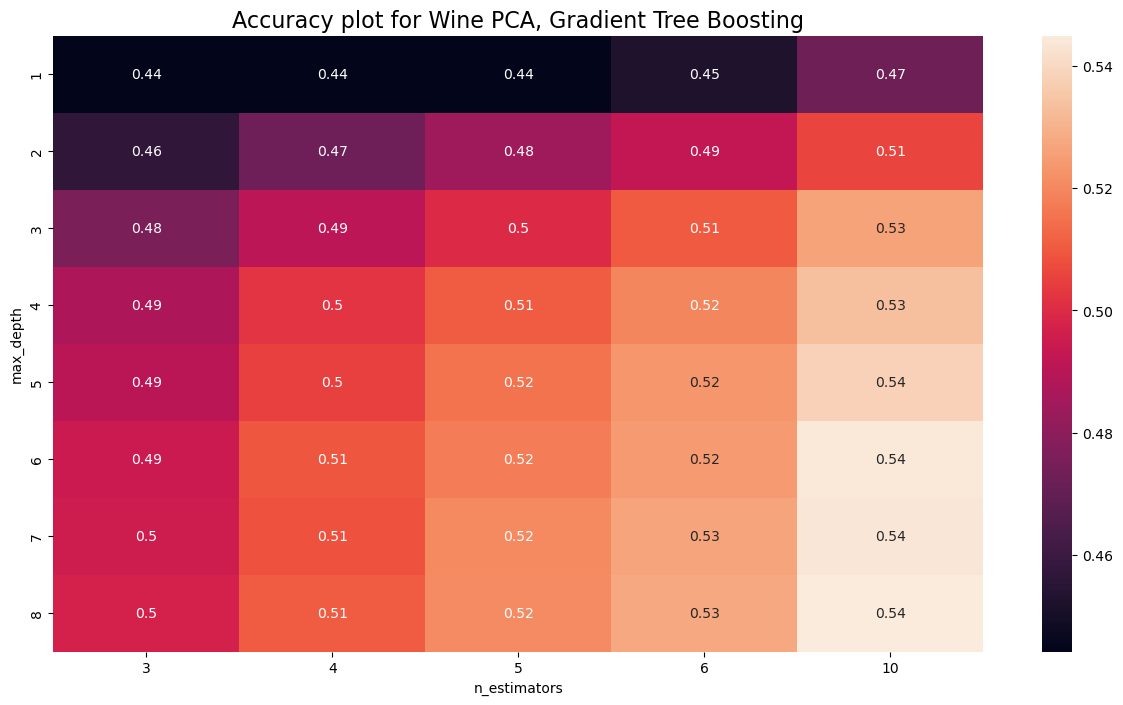

In [31]:
ac_df=pd.DataFrame(grid_w_pca.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid_w_pca.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot_table(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Wine PCA, Gradient Tree Boosting", fontsize = 16)
plt.show()

In [32]:
a_w_pca=results_w_pca.loc[results_w_pca['rank_test_score'] == min(results_w_pca['rank_test_score'])]
a_w_pca = a_w_pca.iloc[:1]

In [33]:
start_w_pca = timeit.default_timer()
gradient_boost = GB(max_depth = int(a_w_pca['param_max_depth']),n_estimators = int(a_w_pca['param_n_estimators']), max_leaf_nodes=int(a_w_pca['param_max_leaf_nodes']))
X_w_train_pca = gradient_boost.fit(X_w_train_pca , y_w_train_pca)
y_w_pred_pca = gradient_boost.predict(X_w_test_pca)
stop_w_pca = timeit.default_timer()

print('Time: %.3f' %(stop_w_pca- start_w_pca))
print('Runtime: %.3f' %(stop_w_pca - start_w_pca), 'sec')

Time: 1.604
Runtime: 1.604 sec


In [35]:
print('The best accuracy for Wine PCA using parameters max_depth=' ,int(a_w_pca['param_max_depth']),', estimators=', int(a_w_pca['param_n_estimators']),'and max leaf nodes=',int(a_w_pca['param_max_leaf_nodes']), "for Gradient Tree Boosting is: %.2f" %(accuracy_score(y_w_pred_pca, y_w_test_pca)*100), '%')

The best accuracy for Wine PCA using parameters max_depth= 7 , estimators= 10 and max leaf nodes= 32 for Gradient Tree Boosting is: 56.55 %


### Wine LDA

In [36]:
X_w_train_lda, X_w_test_lda, y_w_train_lda, y_w_test_lda = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_lda.iloc[:, :-1] = sc.fit_transform(X_w_train_lda.iloc[:, :-1])
X_w_test_lda.iloc[:, :-1] = sc.transform(X_w_test_lda.iloc[:, :-1])

lda = LDA(n_components=4)
X_w_train_lda = lda.fit_transform(X_w_train_lda, y_w_train_lda)
X_w_test_lda = lda.transform(X_w_test_lda)


param_grid = { 'max_leaf_nodes' : [4,8,16,32],
               'max_depth' : [1,2,3,4,5,6,7,8],
               'n_estimators' : [3,4,5,6,10]
             }

grid_w_lda = GridSearchCV(GB(), param_grid, refit= True, verbose=0)
grid_w_lda.fit(X_w_train_lda, y_w_train_lda)
print("Best Parameters for Wine LDA Gradient Tree Boosting are:" +str(grid_w_lda.best_params_))
print("Best Accuracy for Wine LDA Gradient Tree Boosting is : %.2f" %(grid_w_lda.best_score_*100)+"%")

results_w_lda = pd.DataFrame(grid_w_lda.cv_results_)

Best Parameters for Wine LDA Gradient Tree Boosting are:{'max_depth': 8, 'max_leaf_nodes': 32, 'n_estimators': 10}
Best Accuracy for Wine LDA Gradient Tree Boosting is : 56.73%


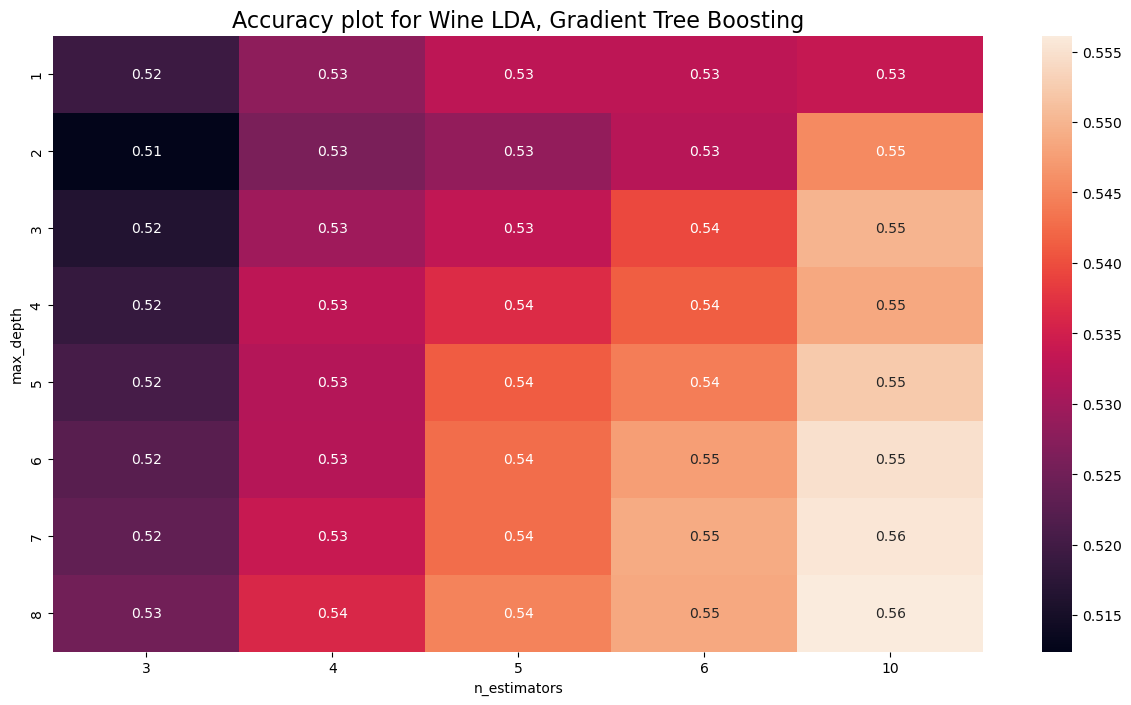

In [37]:
ac_df=pd.DataFrame(grid_w_lda.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid_w_lda.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot_table(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Wine LDA, Gradient Tree Boosting", fontsize = 16)
plt.show()

In [38]:
a_w_lda=results_w_lda.loc[results_w_lda['rank_test_score'] == min(results_w_lda['rank_test_score'])]
a_w_lda = a_w_lda.iloc[:1]

In [39]:
start_w_lda = timeit.default_timer()
gradient_boost = GB(max_depth = int(a_w_lda['param_max_depth']),n_estimators = int(a_w_lda['param_n_estimators']), max_leaf_nodes=int(a_w_lda['param_max_leaf_nodes']))
X_w_train_lda = gradient_boost.fit(X_w_train_lda , y_w_train_lda)
y_w_pred_lda = gradient_boost.predict(X_w_test_lda)
stop_w_lda = timeit.default_timer()

print('Time: %.3f' %(stop_w_lda- start_w_lda))
print('Runtime: %.3f' %(stop_w_lda - start_w_lda), 'sec')

Time: 0.723
Runtime: 0.723 sec


In [40]:
print('The best accuracy for Wine LDA using parameters max_depth=' ,int(a_w_lda['param_max_depth']),', estimators=', int(a_w_lda['param_n_estimators']),'and max leaf nodes=',int(a_w_lda['param_max_leaf_nodes']), "for Gradient Tree Boosting is: %.2f" %(accuracy_score(y_w_pred_lda, y_w_test_lda)*100), '%')

The best accuracy for Wine LDA using parameters max_depth= 8 , estimators= 10 and max leaf nodes= 32 for Gradient Tree Boosting is: 57.97 %
